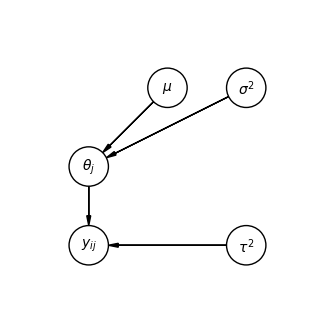

In [38]:
from matplotlib import pyplot as plt
import numpy as np
import daft


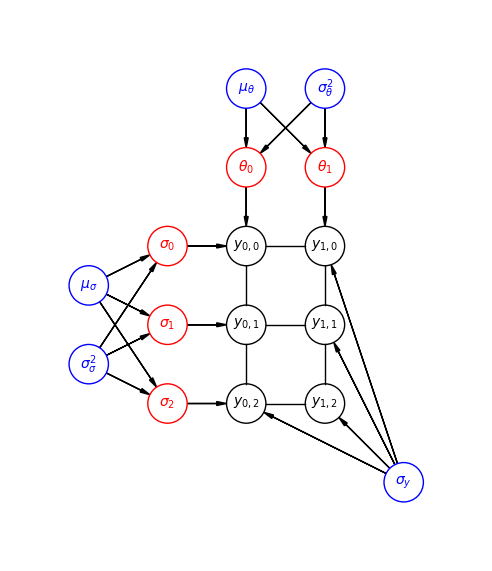

In [130]:
pgm = daft.PGM(shape=[6, 7], origin=[0, 0])
y_origin = np.array([3,4])
y_params = {
    'plot_params': {'edgecolor': 'black'},
    'label_params': {'color': 'black'},
}
latent_params = {
    'plot_params': {'edgecolor': 'red'},
    'label_params': {'color': 'red'},
}

free_params = {
    'plot_params': {'edgecolor': 'blue'},
    'label_params': {'color': 'blue'},
}

# observed variables
pgm.add_node('y00', r'$y_{0,0}$', *(y_origin + [0, 0]), **y_params) # origin node, top left
pgm.add_node('y11', r'$y_{1,1}$', *(y_origin + [1,-1]), **y_params)
pgm.add_node('y10', r'$y_{1,0}$', *(y_origin + [1, 0]), **y_params)
pgm.add_node('y01', r'$y_{0,1}$', *(y_origin + [0,-1]), **y_params)
pgm.add_node('y01', r'$y_{0,1}$', *(y_origin + [0,-1]), **y_params)
pgm.add_node('y02', r'$y_{0,2}$', *(y_origin + [0,-2]), **y_params)
pgm.add_node('y12', r'$y_{1,2}$', *(y_origin + [1,-2]), **y_params)

pgm.add_edge('y00', 'y01', directed=False)
pgm.add_edge('y00', 'y10', directed=False)
pgm.add_edge('y11', 'y01', directed=False)
pgm.add_edge('y11', 'y10', directed=False)
pgm.add_edge('y02', 'y01', directed=False)
pgm.add_edge('y02', 'y12', directed=False)
pgm.add_edge('y12', 'y11', directed=False)

#latent variables
pgm.add_node('theta_0', r'$\theta_0$', *(y_origin + [0, 1]), **latent_params)
pgm.add_node('theta_1', r'$\theta_1$', *(y_origin + [1, 1]), **latent_params)
pgm.add_edge('theta_0', 'y00')
pgm.add_edge('theta_1', 'y10')

pgm.add_node('sigma_0', r'$\sigma_0$', *(y_origin + [-1, 0]), **latent_params)
pgm.add_node('sigma_1', r'$\sigma_1$', *(y_origin + [-1,-1]), **latent_params)
pgm.add_node('sigma_2', r'$\sigma_2$', *(y_origin + [-1,-2]), **latent_params)
pgm.add_edge('sigma_0', 'y00')
pgm.add_edge('sigma_1', 'y01')
pgm.add_edge('sigma_2', 'y02')

# free variables
pgm.add_node('sigma_y', r'$\sigma_y$', *(y_origin + [2,-3]), **free_params)
pgm.add_edge('sigma_y', 'y10')
pgm.add_edge('sigma_y', 'y11')
pgm.add_edge('sigma_y', 'y12')
pgm.add_edge('sigma_y', 'y02')

pgm.add_node('mu_sigma', r'$\mu_{\sigma}$', *(y_origin + [-2, - 0.5]),  **free_params)
pgm.add_node('var_sigma', r'$\sigma^2_{\sigma}$', *(y_origin + [-2, - 1.5]), **free_params)
pgm.add_edge('mu_sigma', 'sigma_0')
pgm.add_edge('mu_sigma', 'sigma_1')
pgm.add_edge('mu_sigma', 'sigma_2')
pgm.add_edge('var_sigma', 'sigma_0')
pgm.add_edge('var_sigma', 'sigma_1')
pgm.add_edge('var_sigma', 'sigma_2')

pgm.add_node('mu_theta', r'$\mu_{\theta}$', *(y_origin + [0, 2]),  **free_params)
pgm.add_node('var_theta', r'$\sigma^2_{\theta}$', *(y_origin + [1, 2]),  **free_params)
pgm.add_edge('mu_theta', 'theta_0')
pgm.add_edge('mu_theta', 'theta_1')
pgm.add_edge('var_theta', 'theta_0')
pgm.add_edge('var_theta', 'theta_1')

pgm.render()
plt.savefig('figures/model_graph.png')